<a href="https://colab.research.google.com/github/Mateus-Brandao/Machine_Learning/blob/main/Recomenda%C3%A7%C3%A3o_musicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dados = pd.read_csv('dados_reduzidos.csv')
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_song
0,0.0594,1921,0.982,Sergei Rachmaninoff,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff - Piano Concerto No. 3 in ...
1,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
2,0.1960,1921,0.579,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
3,0.0731,1921,0.993,Sergei Rachmaninoff,0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867,"Sergei Rachmaninoff - Morceaux de fantaisie, O..."
4,0.7210,1921,0.996,Ignacio Corsini,0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678,Ignacio Corsini - La Mañanita - Remasterizado


In [3]:
dados_genero = pd.read_csv('data_by_genres.csv')
dados_genero.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [4]:
dados_ano = pd.read_csv('data_by_year.csv')
dados_ano.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [5]:
dados.shape

(115992, 20)

In [6]:
dados = dados.drop(columns= ['explicit','key','mode'])
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,release_date,speechiness,tempo,artists_song
0,0.0594,1921,0.982,Sergei Rachmaninoff,0.279,831667,0.211,4BJqT0PrAfrxzMOxytFOIz,0.878,0.665,-20.096,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff - Piano Concerto No. 3 in ...
1,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,1o6I8BglA6ylDMrIELygv1,0.913,0.101,-14.850,Gati Bali,5,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
2,0.1960,1921,0.579,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.697,395076,0.346,4pyw9DVHGStUre4J6hPngr,0.168,0.130,-12.506,Gati Mardika,6,1921,0.0700,119.824,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
3,0.0731,1921,0.993,Sergei Rachmaninoff,0.389,218773,0.088,02GDntOXexBFUvSgaXLPkd,0.527,0.363,-21.091,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867,"Sergei Rachmaninoff - Morceaux de fantaisie, O..."
4,0.7210,1921,0.996,Ignacio Corsini,0.485,161520,0.130,05xDjWH9ub67nJJk82yfGf,0.151,0.104,-21.508,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678,Ignacio Corsini - La Mañanita - Remasterizado


In [7]:
dados.shape

(115992, 17)

In [8]:
dados.isnull().sum()

valence              0
year                 0
acousticness         0
artists             12
danceability         0
duration_ms          0
energy               0
id                   0
instrumentalness     0
liveness             0
loudness             0
name                 0
popularity           0
release_date         0
speechiness          0
tempo                0
artists_song         0
dtype: int64

In [9]:
dados = dados.fillna('-')

In [10]:
dados_genero.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [11]:
dados_genero = dados_genero.drop(columns = ['key','mode'])
dados_genero.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


In [12]:
dados_genero.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [13]:
dados_ano.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [14]:
dados_ano = dados_ano.drop(columns = ['key','mode'])
dados_ano.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333
1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845
2,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189
3,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017
4,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317


In [15]:
dados_ano.isnull().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [16]:
dados.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,release_date,speechiness,tempo,artists_song
0,0.0594,1921,0.982,Sergei Rachmaninoff,0.279,831667,0.211,4BJqT0PrAfrxzMOxytFOIz,0.878,0.665,-20.096,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff - Piano Concerto No. 3 in ...


In [17]:
import plotly.graph_objects as go

In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = dados_ano['year'], y = dados_ano['acousticness'], name = 'Acousticness'))
fig.add_trace(go.Scatter(x = dados_ano['year'], y = dados_ano['valence'], name = 'Valence'))
fig.add_trace(go.Scatter(x = dados_ano['year'], y = dados_ano['danceability'], name = 'Danceability'))
fig.add_trace(go.Scatter(x = dados_ano['year'], y = dados_ano['energy'], name = 'Energy'))
fig.add_trace(go.Scatter(x = dados_ano['year'], y = dados_ano['instrumentalness'], name = 'Instrumentalness'))
fig.add_trace(go.Scatter(x = dados_ano['year'], y = dados_ano['liveness'], name = 'Liveness'))
fig.add_trace(go.Scatter(x = dados_ano['year'], y = dados_ano['speechiness'], name = 'Speechiness'))

In [19]:
ax = px.imshow(dados.corr(), text_auto = True)
ax.show()

## Clustering por gênero

In [20]:
dados_genero.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


In [21]:
dados_generos1 = dados_genero.drop(columns = ['genres'])
dados_generos1.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
SEED = 101
np.random.seed(101)

pipeline_pca = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state = SEED))])

In [24]:
genre_embedding_pca = pipeline_pca.fit_transform(dados_generos1)
projection = pd.DataFrame(columns = ['x','y'], data = genre_embedding_pca)

In [25]:
projection.head()

,x,y
0,5.910268,-0.011146
1,2.787093,4.498483
2,-0.757538,-1.258495
3,1.020521,-0.931690
4,0.753911,-0.999861


In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans_pca = KMeans(n_clusters = 5, random_state = SEED)

kmeans_pca.fit(projection)

dados_genero['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

In [28]:
projection.head()

,x,y,cluster_pca
0,5.910268,-0.011146,1
1,2.787093,4.498483,1
2,-0.757538,-1.258495,4
3,1.020521,-0.931690,0
4,0.753911,-0.999861,0


In [29]:
projection['genres'] = dados_genero['genres']
projection.head()

,x,y,cluster_pca,genres
0,5.910268,-0.011146,1,21st century classical
1,2.787093,4.498483,1,432hz
2,-0.757538,-1.258495,4,8-bit
3,1.020521,-0.931690,0,[]
4,0.753911,-0.999861,0,a cappella


In [30]:
fig = px.scatter(projection, x = 'x', y = 'y', color = 'cluster_pca', hover_data = ['x','y','genres'])
fig.show()

In [31]:
pipeline_pca[1].explained_variance_ratio_.sum()

0.4927066994726641

In [32]:
pipeline_pca[1].explained_variance_.sum()

5.421597305805697

## Clustering usando a base principal

In [33]:
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,release_date,speechiness,tempo,artists_song
0,0.0594,1921,0.982,Sergei Rachmaninoff,0.279,831667,0.211,4BJqT0PrAfrxzMOxytFOIz,0.878,0.665,-20.096,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff - Piano Concerto No. 3 in ...
1,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,1o6I8BglA6ylDMrIELygv1,0.913,0.101,-14.850,Gati Bali,5,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
2,0.1960,1921,0.579,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.697,395076,0.346,4pyw9DVHGStUre4J6hPngr,0.168,0.130,-12.506,Gati Mardika,6,1921,0.0700,119.824,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
3,0.0731,1921,0.993,Sergei Rachmaninoff,0.389,218773,0.088,02GDntOXexBFUvSgaXLPkd,0.527,0.363,-21.091,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867,"Sergei Rachmaninoff - Morceaux de fantaisie, O..."
4,0.7210,1921,0.996,Ignacio Corsini,0.485,161520,0.130,05xDjWH9ub67nJJk82yfGf,0.151,0.104,-21.508,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678,Ignacio Corsini - La Mañanita - Remasterizado


In [34]:
dados_2000 = dados.query('year >= 2000')
dados_2000.reset_index(inplace = True)
dados_2000 = dados_2000.drop(columns = ['index'])
dados_2000.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,release_date,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,2000-07-10,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,2000-10-31,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,2000-10-24,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,2000,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,2000-05-23,0.0572,104.504,Eminem - The Real Slim Shady


In [35]:
dados_2000['artists'].value_counts().head()

Drake           170
Taylor Swift    156
Eminem          145
Kanye West      136
BTS             122
Name: artists, dtype: int64

In [36]:
dados_2000['artists_song'].value_counts().head()

Coldplay - Yellow                                       1
Iron Maiden - Ghost of the Navigator - 2015 Remaster    1
Marco Barrientos - Al Que Esta Sentado en el Trono      1
Rage Against The Machine - Kick out the Jams            1
The Cure - Out of This World                            1
Name: artists_song, dtype: int64

In [37]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(dtype = int)

colunas_one = one.fit_transform(dados_2000[['artists']]).toarray()

dados2 = dados_2000.drop(columns= ['artists'])

dados_dummies = pd.concat([dados2, pd.DataFrame(colunas_one, columns = one.get_feature_names_out(['artists']))], axis = 1)
dados_dummies.head()

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,...,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior,artists_オメガトライブ
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0


In [38]:
dados_dummies = dados_dummies.drop(columns = ['id','name','artists_song','release_date'])

In [39]:
dados_dummies.shape

(21546, 1575)

In [40]:
pipeline_pca = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state = SEED))])

music_embedding_pca = pipeline_pca.fit_transform(dados_dummies)
projection_music = pd.DataFrame(data = music_embedding_pca)

In [41]:
pipeline_pca[1].n_components_

1094

In [42]:
kmeans_pca_pipeline = KMeans(n_clusters = 50, random_state = SEED)

kmeans_pca_pipeline.fit(projection_music)

dados_2000['cluster_pca'] = kmeans_pca_pipeline.predict(projection_music)
projection_music['cluster_pca'] = kmeans_pca_pipeline.predict(projection_music)

In [43]:
projection_music['artists'] = dados_2000['artists']
projection_music['song'] = dados_2000['artists_song']

In [44]:
projection_music.head()

,0,1,2,3,4,5,6,7,8,9,...,1087,1088,1089,1090,1091,1092,1093,cluster_pca,artists,song
0,0.070576,0.520117,2.216909,-0.910164,0.528643,-0.154408,-0.298385,-0.564471,-2.690171,1.975150,...,4.132720e-13,-6.825338e-13,4.839645e-13,4.518746e-13,6.378945e-13,7.068927e-13,-4.571944e-13,39,Coldplay,Coldplay - Yellow
1,-1.434962,0.045598,-1.674609,1.906482,0.381099,-1.111431,-1.133168,0.506212,-1.713906,0.350026,...,2.135808e-12,-3.956178e-13,-1.435900e-12,-7.807471e-13,5.505415e-13,-1.906494e-12,1.629612e-12,11,OutKast,OutKast - Ms. Jackson
2,-1.029663,0.529666,0.804739,-0.376150,-0.200566,-0.213421,0.789295,1.980178,-1.639476,1.264259,...,8.209998e-13,4.674301e-13,1.231989e-13,-2.584201e-13,-6.075792e-14,1.275757e-13,2.319703e-15,11,Linkin Park,Linkin Park - In the End
3,-0.964129,1.169663,0.447230,-1.087722,0.349689,-0.573343,-0.590508,0.942237,-1.313010,0.962899,...,4.127510e-13,-5.329364e-13,8.214375e-13,1.212473e-12,-4.439590e-14,2.274463e-13,-3.642735e-12,11,3 Doors Down,3 Doors Down - Kryptonite
4,-1.761283,-0.381690,-1.215170,1.338292,1.387351,-1.349616,0.062583,0.458048,-2.160498,0.497874,...,7.631266e-13,2.409427e-14,-7.627453e-13,-1.121654e-13,5.255965e-13,-2.729879e-13,3.896664e-13,28,Eminem,Eminem - The Real Slim Shady


In [45]:
fig = px.scatter(projection_music, x = 0, y = 1, color = 'cluster_pca', hover_data = [0, 1,'song'])
fig.show()

In [46]:
pipeline_pca[1].explained_variance_ratio_.sum()

0.7005047825247124

In [47]:
pipeline_pca[1].explained_variance_.sum()

1103.346241343096

## Sistema de Recomendação

In [48]:
from pandas.core.dtypes.cast import maybe_upcast
from sklearn.metrics.pairwise import euclidean_distances

In [49]:
nome_musica = 'Ed Sheeran - Shape of You'

In [50]:
cluster = list(projection_music[projection_music['song'] == nome_musica]['cluster_pca'])[0]
print(cluster)

11


In [51]:
musicas_recomendadas = projection_music[projection_music['cluster_pca'] == cluster][[0,1,'song']]
musicas_recomendadas

,0,1,song
1,-1.434962,0.045598,OutKast - Ms. Jackson
2,-1.029663,0.529666,Linkin Park - In the End
3,-0.964129,1.169663,3 Doors Down - Kryptonite
6,-1.287399,0.534279,Nelly - Ride Wit Me
8,-1.805141,1.459528,*NSYNC - Bye Bye Bye
...,...,...,...
21532,1.125644,-1.627043,Dan + Shay - Christmas Isn't Christmas
21534,-2.010282,-2.015192,Quinn XCII - A Letter To My Younger Self (feat...
21536,-1.056428,-0.741556,Miley Cyrus - Zombie (Live from the NIVA Save ...
21541,1.165484,-2.908983,Bazzi - I Don't Think I'm Okay


In [52]:
x_musica = list(projection_music[projection_music['song'] == nome_musica][0])[0]
y_musica = list(projection_music[projection_music['song'] == nome_musica][1])[0]

distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados_2000['id']
musicas_recomendadas['distancia'] = distancias

recomendada = musicas_recomendadas.sort_values('distancia').head(10)
recomendada

,0,1,song,id,distancia
2480,-0.973757,-2.941887,Ed Sheeran - Shape of You,7qiZfU4dY1lWllzX7mPBI3,0.000000
2947,-1.026196,-2.896436,Ariana Grande - obvious,0q85C1JiECyYIQthz1posA,0.069395
2953,-1.004995,-2.873749,Conan Gray - Maniac,6KfoDhO4XUWSbnyKjNp9c4,0.074958
5378,-0.955238,-3.014763,Ed Sheeran - South of the Border (feat. Camila...,4vUmTMuQqjdnvlZmAH61Qk,0.075192
19635,-1.048494,-2.883436,Kygo - Like It Is,3frUvGrmGcay91lvFbOgsN,0.094880
5355,-1.083812,-2.939723,Marshmello - Here With Me,5icOoE6VgqFKohjWWNp0Ac,0.110076
5313,-1.091714,-2.910883,Bazzi - Myself,5YLHLxoZsodDWjqSgjhBf3,0.121963
5351,-0.911092,-2.831729,Khalid - Up All Night,1mpD5Q8IM32I4bF6eCpU74,0.126735
16108,-1.052867,-2.837928,Melanie Martinez - The Bakery,3JUeBSM4bsJGwYCVRqMeuC,0.130636
19717,-1.104277,-2.901552,Charlie Puth - Girlfriend,1UNs8AlFM8c0uAkSyjIW3P,0.136610


In [53]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [55]:
scope = 'user-library-read playlist-modify-private'
OAuth = SpotifyOAuth(
    scope = scope,
    redirect_uri= 'http://localhost:5000/callback',
    client_id= '1ba90ef899ee45d6ae8dd8a330b4aa9e',
    client_secret = '2cf87b97019244828be68454c8b750fc'
)

In [56]:
client_credentials_manager = SpotifyClientCredentials(client_id='1ba90ef899ee45d6ae8dd8a330b4aa9e', client_secret = '2cf87b97019244828be68454c8b750fc')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [57]:
from skimage import io

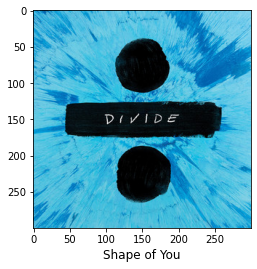

In [62]:
nome_musica = 'Ed Sheeran - Shape of You'
id = dados_2000[dados_2000['artists_song'] == nome_musica]['id'].iloc[0]

track = sp.track(id)
url = track['album']['images'][1]['url']
name = track['name']

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 12)
plt.show()

## Buscando os dados da playlist

In [73]:
def recommend_id(playlist_id):
  url = []
  name = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])

  return name, url

In [74]:
recommend_id(recomendada['id'])

(['Shape of You',
  'obvious',
  'Maniac',
  'South of the Border (feat. Camila Cabello & Cardi B)',
  'Like It Is',
  'Here With Me',
  'Myself',
  'Up All Night',
  'The Bakery',
  'Girlfriend'],
 ['https://i.scdn.co/image/ab67616d00001e02ba5db46f4b838ef6027e6f96',
  'https://i.scdn.co/image/ab67616d00001e025ef878a782c987d38d82b605',
  'https://i.scdn.co/image/ab67616d00001e0288e3cda6d29b2552d4d6bc43',
  'https://i.scdn.co/image/ab67616d00001e0273304ce0653c7758dd94b259',
  'https://i.scdn.co/image/ab67616d00001e022e3aeb1879f589ff44304411',
  'https://i.scdn.co/image/ab67616d00001e022cbb5f97a0853d1c7cbbe231',
  'https://i.scdn.co/image/ab67616d00001e02f9f2d43ff44bdfbe8c556f8d',
  'https://i.scdn.co/image/ab67616d00001e0236b5099b9e614214f6919bd9',
  'https://i.scdn.co/image/ab67616d00001e022c6cecb35ba9d677415124c3',
  'https://i.scdn.co/image/ab67616d00001e02eeb1236a7d65549de3657457'])

## Recomendador Pronto

In [79]:
def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_music[projection_music['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_music[projection_music['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_music[projection_music['song']== nome_musica][0])[0]
  y_musica = list(projection_music[projection_music['song']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()

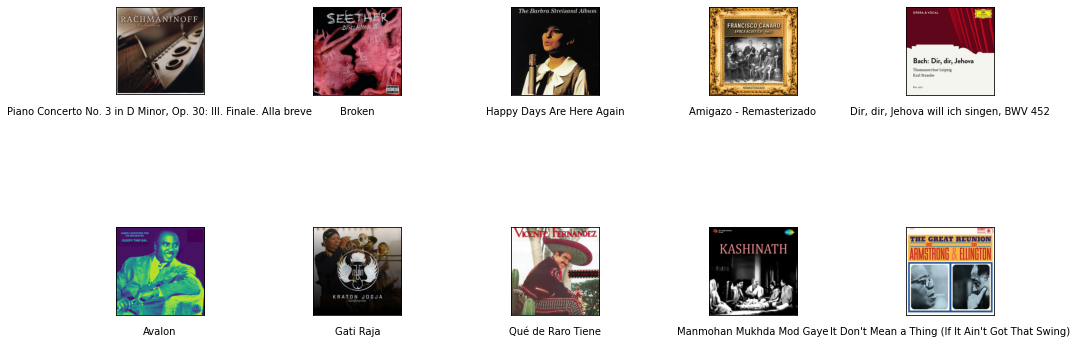

In [82]:
recomendador('Coldplay - Yellow')